# 01. Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 02. Data Collection

In [3]:
# Load the dataset from csv to pandas dataframe
df = pd.read_csv('/content/Medical_Data/heart.csv')

# import the first 5 raws of the datas
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Determine the number of data poins and number of features
df.shape

(303, 14)

In [5]:
# get the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking for the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# list categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
numerical_features = df.select_dtypes(exclude=['object']).columns.to_list()

print("Categorical Features:",categorical_features)
print("Numerical Features:",numerical_features)

Categorical Features: []
Numerical Features: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [8]:
# Descriptive statistics of the data set
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['output'].value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: output, dtype: float64

The classes in this dataset are balanced.

There are 54.45% of the patients have a higher risk of heart disease, while 45.54% of the patients have a lower risk of heart disease.

# 03. Plotting

In [10]:
sns.set()

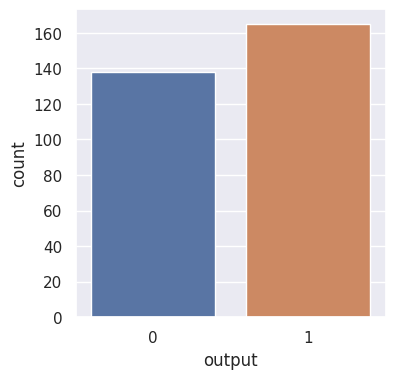

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.output)
plt.show()


Text(0.5, 1.0, 'Distribution of age')

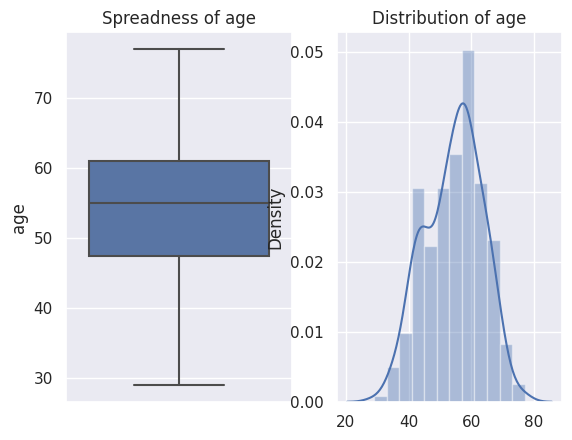

In [12]:
plt.subplot(1,2,1)
sns.boxplot(y=df['age'])
plt.title('Spreadness of age')


plt.subplot(1,2,2)
sns.distplot(x=df['age'])
plt.title('Distribution of age')




*   Patients in this data set mostly in between 48 and 61 years of age.


*   The age distribution in this data set resembles a normal distribution.



Spreadness age by sex and Risk(Output)

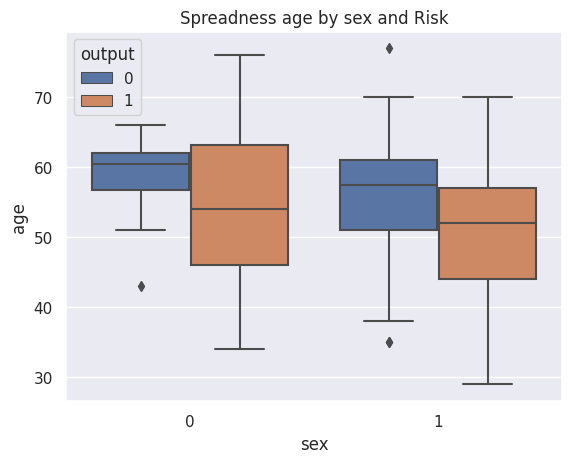

In [13]:
sns.boxplot(x='sex', y='age', data=df, hue='output')
plt.title('Spreadness age by sex and Risk')
plt.show()



*   The age of female patients have high risk of heart disease is more spread out than that of female patients have low risk.

* Male patients have higher risk of heart disease were slightly older than male patients have lower risk.



In [14]:
df.groupby(['sex', 'output']).agg({'output':'count'})

output
sex output        
0   0           24
    1           72
1   0          114
    1           93

## 3.1 Scatter plot of the cholestoral level against the age


<Figure size 400x400 with 0 Axes>

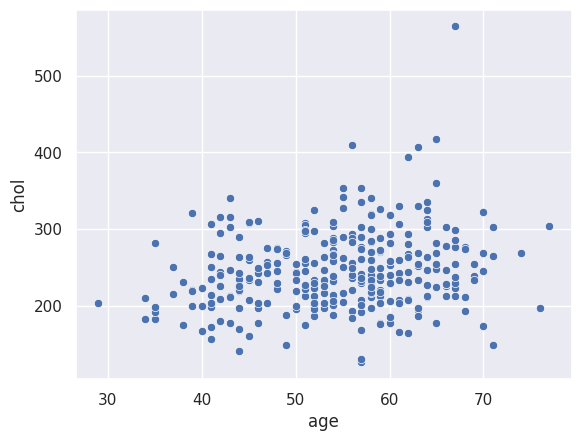

<Figure size 400x400 with 0 Axes>

In [15]:
sns.scatterplot(x='age',y='chol',data=df)
plt.figure(figsize=(4,4))

Interpretation:

*   The points are randomly distributed across the plot.
*   This suggests that there is no correlation between age and chol.

## 3.2 Scatter plot of the cholestoral level against the age

<Figure size 400x600 with 0 Axes>

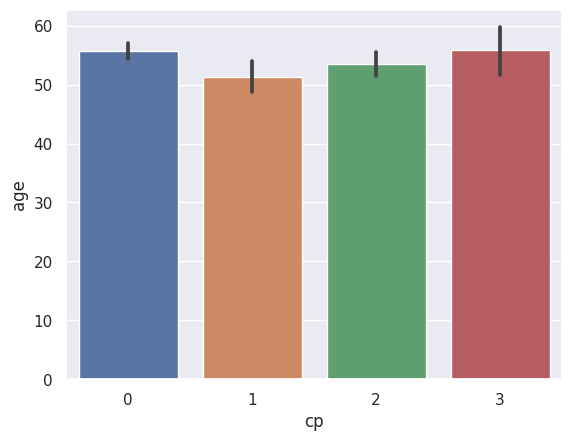

<Figure size 400x600 with 0 Axes>

In [16]:
#bar plot of the mean age of patients in each chest pain category
sns.barplot(x='cp',y='age',data=df)
plt.figure(figsize=(4,6))



*   The results of the bar plot suggest that chest pain category is not a strong predictor of age. However, age should still be considered when evaluating patients with chest pain.



Bar plot of the mean cholesterol level (chol) for patients in each output category (output).

<Axes: xlabel='output', ylabel='chol'>

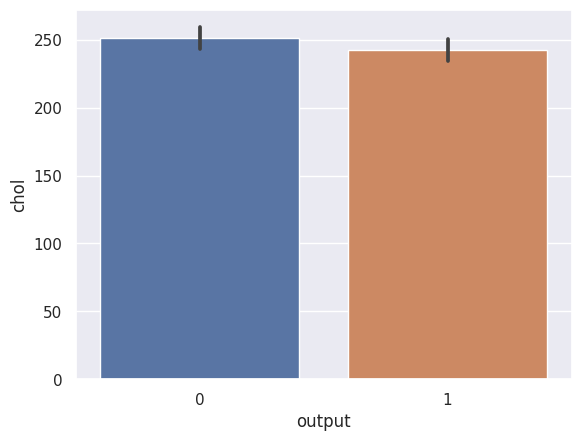

In [17]:
sns.barplot(x='output',y='chol',data=df)

Train Test Split

In [18]:
# Split the DataFrame into features and target
x = df.drop(['output'],axis=1)
y = df['output']

# Perform the train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Perform the train-test split
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

Logistic Regression

In [20]:
# Create a LogisticRegression object
lr = LogisticRegression()

# Fit the LogisticRegression model to the training features and target
lr.fit(xtrain,ytrain)

LogisticRegression()

In [21]:
# Evaluate the performance of the LogisticRegression model on the test set
lr.score(xtest,ytest)

0.8852459016393442

In [22]:
# Predict the target values for the test features
yp = lr.predict(xtest)

In [23]:
# Compute the confusion matrix for the predictions
c = confusion_matrix(ytest,yp)
print(c)

[[25  4]
 [ 3 29]]


<Axes: >

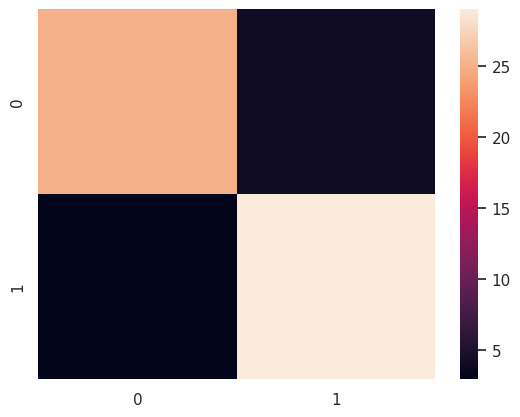

In [24]:
# Create a heatmap of the confusion matrix
sns.heatmap(c)

SVC

In [25]:
# import necessary libraries
from sklearn.model_selection import cross_val_score

In [26]:
# Create a Support Vector Machine classifier object
sv = SVC()

# Fit the classifier to the training data
sv.fit(xtrain,ytrain)

# Evaluate the performance accuracy of the classifier on the test data
sv.score(xtest,ytest)

0.8688524590163934

Random Forest Classifier

In [27]:
# Create a Random Forest Classifier object with  n_estimators
rfc = RandomForestClassifier(n_estimators=200)

# Fit the Random Forest Classifier to the training features and target
rfc.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [28]:
rfc.score(xtest,ytest)

0.8688524590163934

In [29]:
# Calculate the cross-validation score of the Random Forest Classifier
rfm = cross_val_score(rfc,X=xtrain,y=ytrain,cv=10)

# Print the mean of the cross-validation score
print(rfm.mean())

0.7933333333333333




*   This model can  predict the output for 81.4% of the data points correctly and it has a good performance.




K nearest Neighbour

In [30]:
# import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Create a K-Nearest Neighbors Classifier object with 5 neighbors
kn = KNeighborsClassifier(n_neighbors=5)

In [32]:
# Fit the K-Nearest Neighbors Classifier to the training features and target
kn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [33]:
# Evaluate the performance of the K-Nearest Neighbors Classifier on the test features and target
kn.score(xtest,ytest)

0.9016393442622951

In [34]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [35]:
a = [[29,1,0,120,190,0,1,130,1,1.3,0,0,0]]
kn.predict(a)

array([1])



*   This model is able to correctly predict the output for 90.16% of the data points in the test set, which is a very good performance.




In [36]:
# Predict the class of a new data point
a = [[24,0,0,120,140,0,1,130,1,1.3,0,0,0]]
kn.predict(a)

array([1])



*   This patient has a risk of heart attack.

